# Explore here

In [1]:
%pip install pandas numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install missingno
%pip install statsmodels
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kern

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pickle
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import os

## Carga del conjunto de datos

In [3]:
# Cargar conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Guardar en la carpeta data/raw
df.to_csv("../data/raw/df.csv", index = False)

## Exploración y limpieza de los datos

In [5]:
# Conocer las dimensiones de los datos
df.shape

(48895, 16)

In [6]:
# Obtener la información sobre tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Hallazgos**
- El conjunto de datos tiene un total de 48.895 filas y 16 columnas.
- Las variables 'last_review' y 'reviews_per_month' tienen más de 1.000 valores nulos.
- La variable 'name' tiene 16 valores nulos y 'host_name' tiene 21 valores nulos.
- Las demás variables no presentan valores nulos.
- Los datos contienen 10 características numéricas y 6 características categóricas

In [7]:
# Ver lo número de valores únicos
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
# Eliminar variables que no tiene valores predictivos
df.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)

In [9]:
# Eliminar la variable neighbourhood porque existen otras variables que ya indican la ubicación
df.drop(['neighbourhood'], axis=1, inplace=True)

In [10]:
# Eliminar las variables 'last_review' debido a la gran cantidad de datos nulos que presenta
df.drop(['last_review'], axis=1, inplace=True)

In [11]:
# Comprobar si hay filas duplicadas
df.duplicated().sum()

np.int64(0)

In [12]:
# Codificar valores categóricos de las columnas 'room_type' y 'neighbourhood_group' (convertir a valores numéricos)
le_room = LabelEncoder()
df['room_type'] = le_room.fit_transform(df['room_type'])

le_neigh = LabelEncoder()
df['neighbourhood_group'] = le_neigh.fit_transform(df['neighbourhood_group'])

In [13]:
# Guardar los codificadores con pickle
encoders = {
    'room_type': le_room,
    'neighbourhood_group': le_neigh
}

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# Cargar codificadores
with open('encoders.pkl', 'rb') as f:
    loaded_encoders = pickle.load(f)

le_room_loaded = loaded_encoders['room_type']
le_neigh_loaded = loaded_encoders['neighbourhood_group']

In [14]:
print("Categorías codificadas en 'room_type':", le_room_loaded.classes_)
print("Categorías codificadas en 'neighbourhood_group':", le_neigh_loaded.classes_)

Categorías codificadas en 'room_type': ['Entire home/apt' 'Private room' 'Shared room']
Categorías codificadas en 'neighbourhood_group': ['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


In [15]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,40.80902,-73.94190,1,150,3,0,NaN,1,365
3,1,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [16]:
# Obtener la información estadística de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,48895.0,1.675345,0.735816,0.00000,1.00000,2.00000,2.000000,4.00000
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895.0,0.504060,0.545379,0.00000,0.00000,0.00000,1.000000,2.00000
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


**Hallazgos:**
- La variable price presenta un valor máximo muy elevado (10.000) en comparación con el resto de los valores.
- La variable minimum_nights también presenta un valor max atípicamente alto.

## Análisis de la variable predictiva (price)

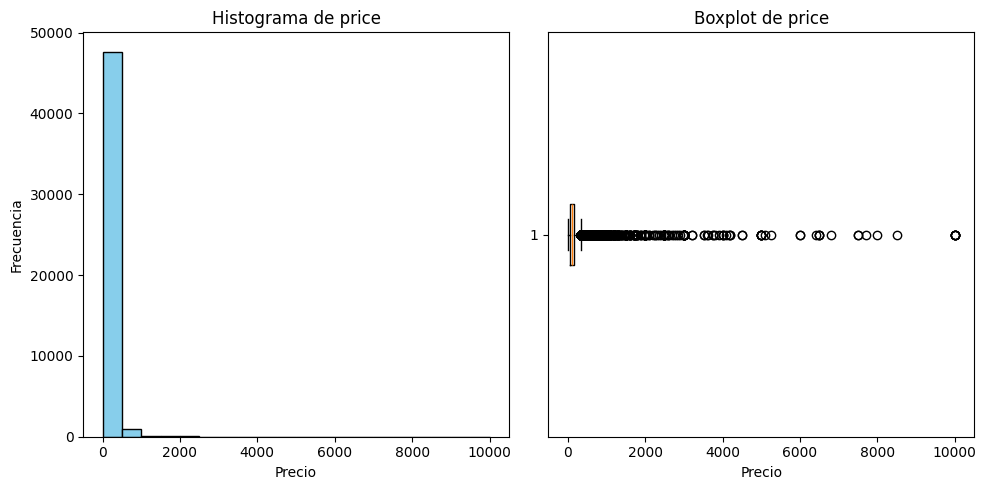

In [17]:
# Distribuición de los precios de las viviendas
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de price')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de price')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()


La distribución de los datos de precios es asimétrica y presenta muchos valores atípicos. En este caso, voy a aplicar una transformación logarítmica para reducir la asimetría.

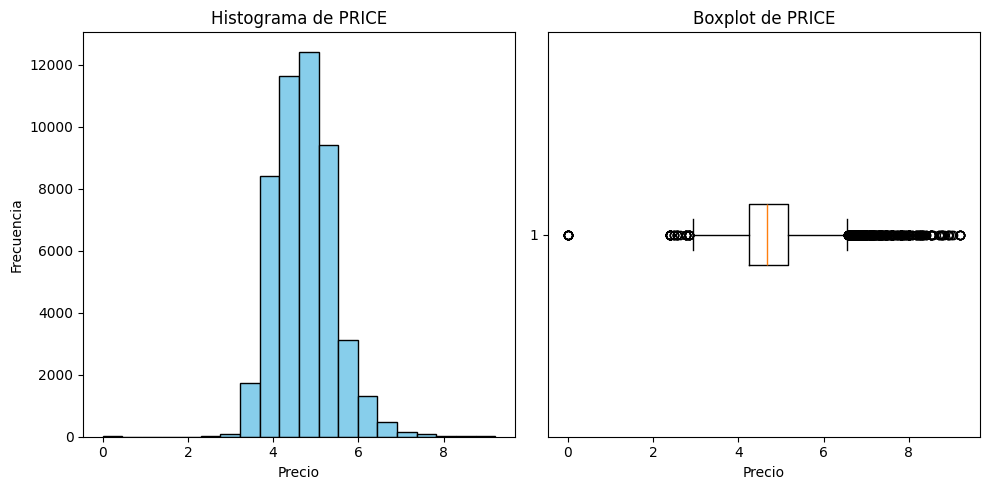

In [18]:
# Transformar la variable price con logaritmos
df['price_log'] = np.log1p(df['price'])

# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price_log'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price_log'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

## Revisar los valores faltantes

In [19]:
df.isnull().mean()*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
price_log                          0.000000
dtype: float64

La variable reviews_per_month presenta más del 20 % de valores nulos.

<Axes: >

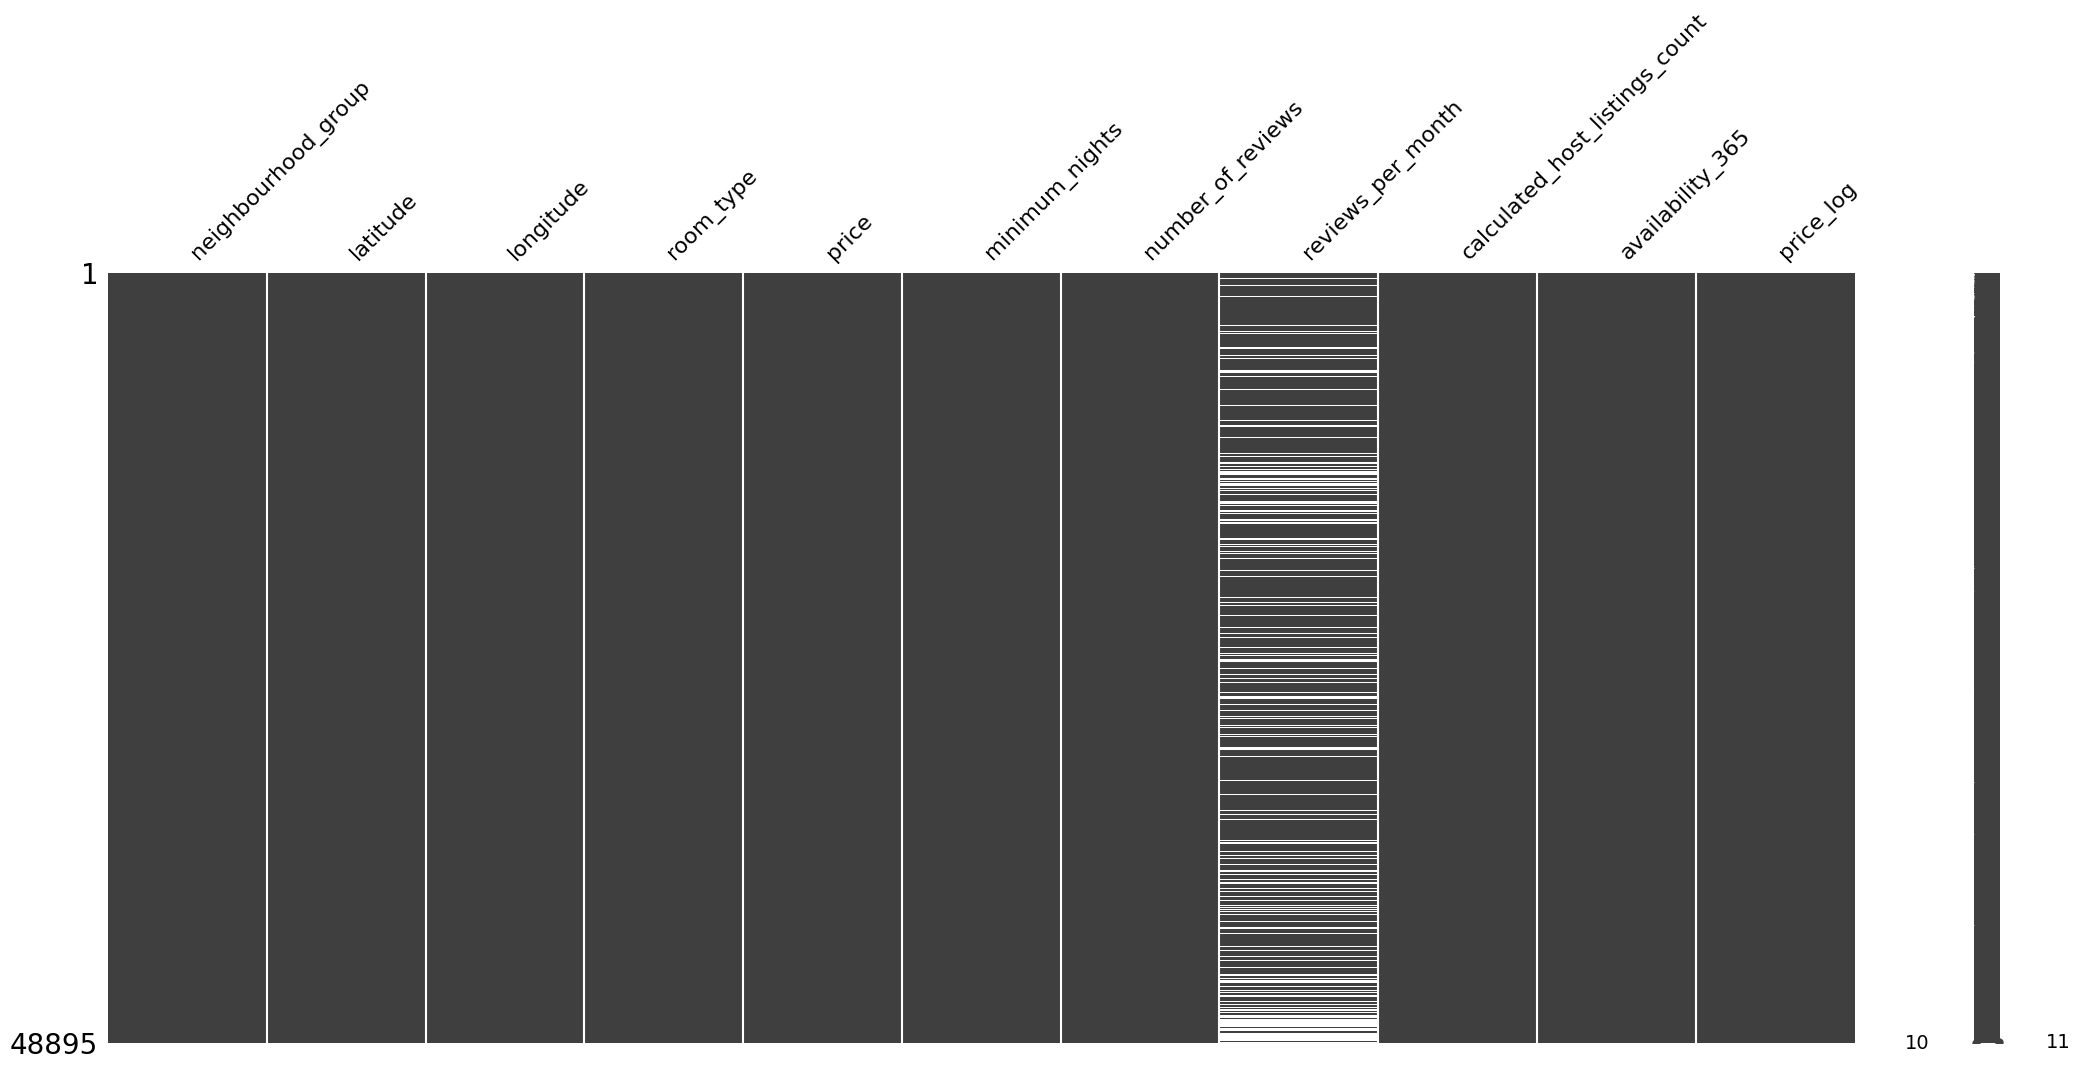

In [20]:
# Visualizar los valores faltantes para identificar posibles patrones en su distribución
msno.matrix(df)

**Hallazgos:**
- Aparentemente, no hay un patrón claro en la distribución de los datos faltantes.
- La variable reviews_per_month me parece importante, ya que podría ser una buena métrica de actividad o popularidad del alojamiento. Por eso, opto por reemplazar los valores faltantes.

In [21]:
# Reemplazar los valores faltantes
imputador_knn = KNNImputer(n_neighbors=3)
matriz_imp = imputador_knn.fit_transform(df)
df = pd.DataFrame(matriz_imp, columns=df.columns, index=df.index)

In [22]:
# Confirmar si hay valores faltantes
df.isna().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

## Partición de los datos

In [23]:
# Dividir el conjunto de datos en train y test
X = df.drop(['price_log','price'],axis=1)
y = df['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(39116, 9)

In [25]:
X_test.shape

(9779, 9)

## Observaciones influentes
Detectar valores atípicos influyentes utilizando la distancia de Cook

In [26]:
# Ajusta el modelo
X_train_const = sm.add_constant(X_train) # Agrega una constante (columna de unos) al conjunto de entrenamiento
model = sm.OLS(y_train, X_train_const).fit() # Ajusta un modelo de regresión lineal

# Calcular la distancia de Cook para cada observación
cooks_distance = model.get_influence().cooks_distance

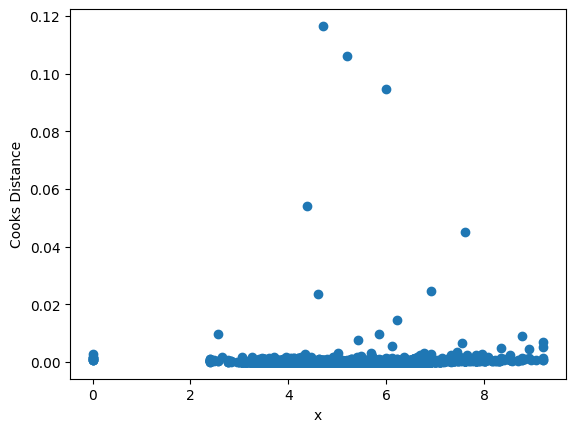

In [27]:
plt.scatter(y_train, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

El gráfico muestra que la mayoría de los puntos tienen una baja influencia. Sin embargo, hay un subconjunto con valores de distancia de Cook notablemente más altos.

In [28]:
# Definir punto de corte
pto_corte = 4/len(X_train)

In [29]:
# Alojamientos influyentes
idx_alojamientos_influyentes = np.where(cooks_distance[0]>pto_corte)[0]
print(f'Porcentaje de alojamientos a desestimar: {len(idx_alojamientos_influyentes)/len(df)*100}%')

Porcentaje de alojamientos a desestimar: 3.650680028632784%


In [30]:
X_train.index[idx_alojamientos_influyentes]

Index([44177, 47400, 18605, 25390, 41224, 47091, 30259, 19511, 33430, 14747,
       ...
       41523, 48033, 33159,  5258,  2027, 48555, 41606, 11394,  1899, 37194],
      dtype='int64', length=1785)

In [31]:
X_train1 = X_train.loc[~X_train.index.isin(X_train.index[idx_alojamientos_influyentes]),:]

In [32]:
y_train1 = y_train.loc[~X_train.index.isin(X_train.index[idx_alojamientos_influyentes])]

## Importancia de caracteristicas
Voy a aplicar XGBoost para compreender en qué órdenes de importancia las distintas variables están influyendo en tus predicciones.

In [33]:
# Crear un modelo de regresión usando XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
xgb_model.feature_importances_

array([0.00856971, 0.02744399, 0.04419765, 0.8192453 , 0.02434086,
       0.01869871, 0.01319281, 0.01920833, 0.02510263], dtype=float32)

In [34]:
# Crear un df de importancias de características
dict_data = {'Feature':X_train.columns, 'Importancia':xgb_model.feature_importances_*100}
df_imp = pd.DataFrame(dict_data)
# Ordenar las variables en orden descendente según su importancia
df_imp.sort_values(by='Importancia', ascending=False, inplace=True)

In [35]:
df_imp

,Feature,Importancia
3,room_type,81.924530
2,longitude,4.419765
1,latitude,2.744399
8,availability_365,2.510263
4,minimum_nights,2.434086
7,calculated_host_listings_count,1.920833
5,number_of_reviews,1.869871
6,reviews_per_month,1.319281
0,neighbourhood_group,0.856971


In [36]:
# Eliminar las características no importantes (importancia < 1)
X_train1.drop(df_imp[df_imp['Importancia']<1]['Feature'], axis=1, inplace=True)
X_test.drop(df_imp[df_imp['Importancia']<1]['Feature'], axis=1, inplace=True)

/tmp/ipykernel_583/4100119875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1.drop(df_imp[df_imp['Importancia']<1]['Feature'], axis=1, inplace=True)


In [37]:
X_train1.shape

(37331, 8)

## VIF (Factor de Inflación de la Varianza)
Voy a utilizar el VIF para saber si las variables independientes están altamente correlacionadas entre sí. 

In [38]:
vif = pd.Series([variance_inflation_factor(X_train1.corr().values, i) for i in range(X_train1.corr().shape[1])], index=X_train1.columns)
vif

latitude                          1.019147
longitude                         1.430759
room_type                         1.256536
minimum_nights                    1.620804
number_of_reviews                 4.488523
reviews_per_month                 4.916240
calculated_host_listings_count    1.549620
availability_365                  1.903144
dtype: float64

**Hallazgos**
- Las variables number_of_reviews y reviews_per_month presentan colinealidad moderada (con valores de VIF cercanos a 5).
- Las demás variables no presentan colinealidad significativa; muestran niveles bajos o aceptables.

Voy a utilizar la matriz de correlación para comprobar si existe una alta relación entre las variables

<Axes: >

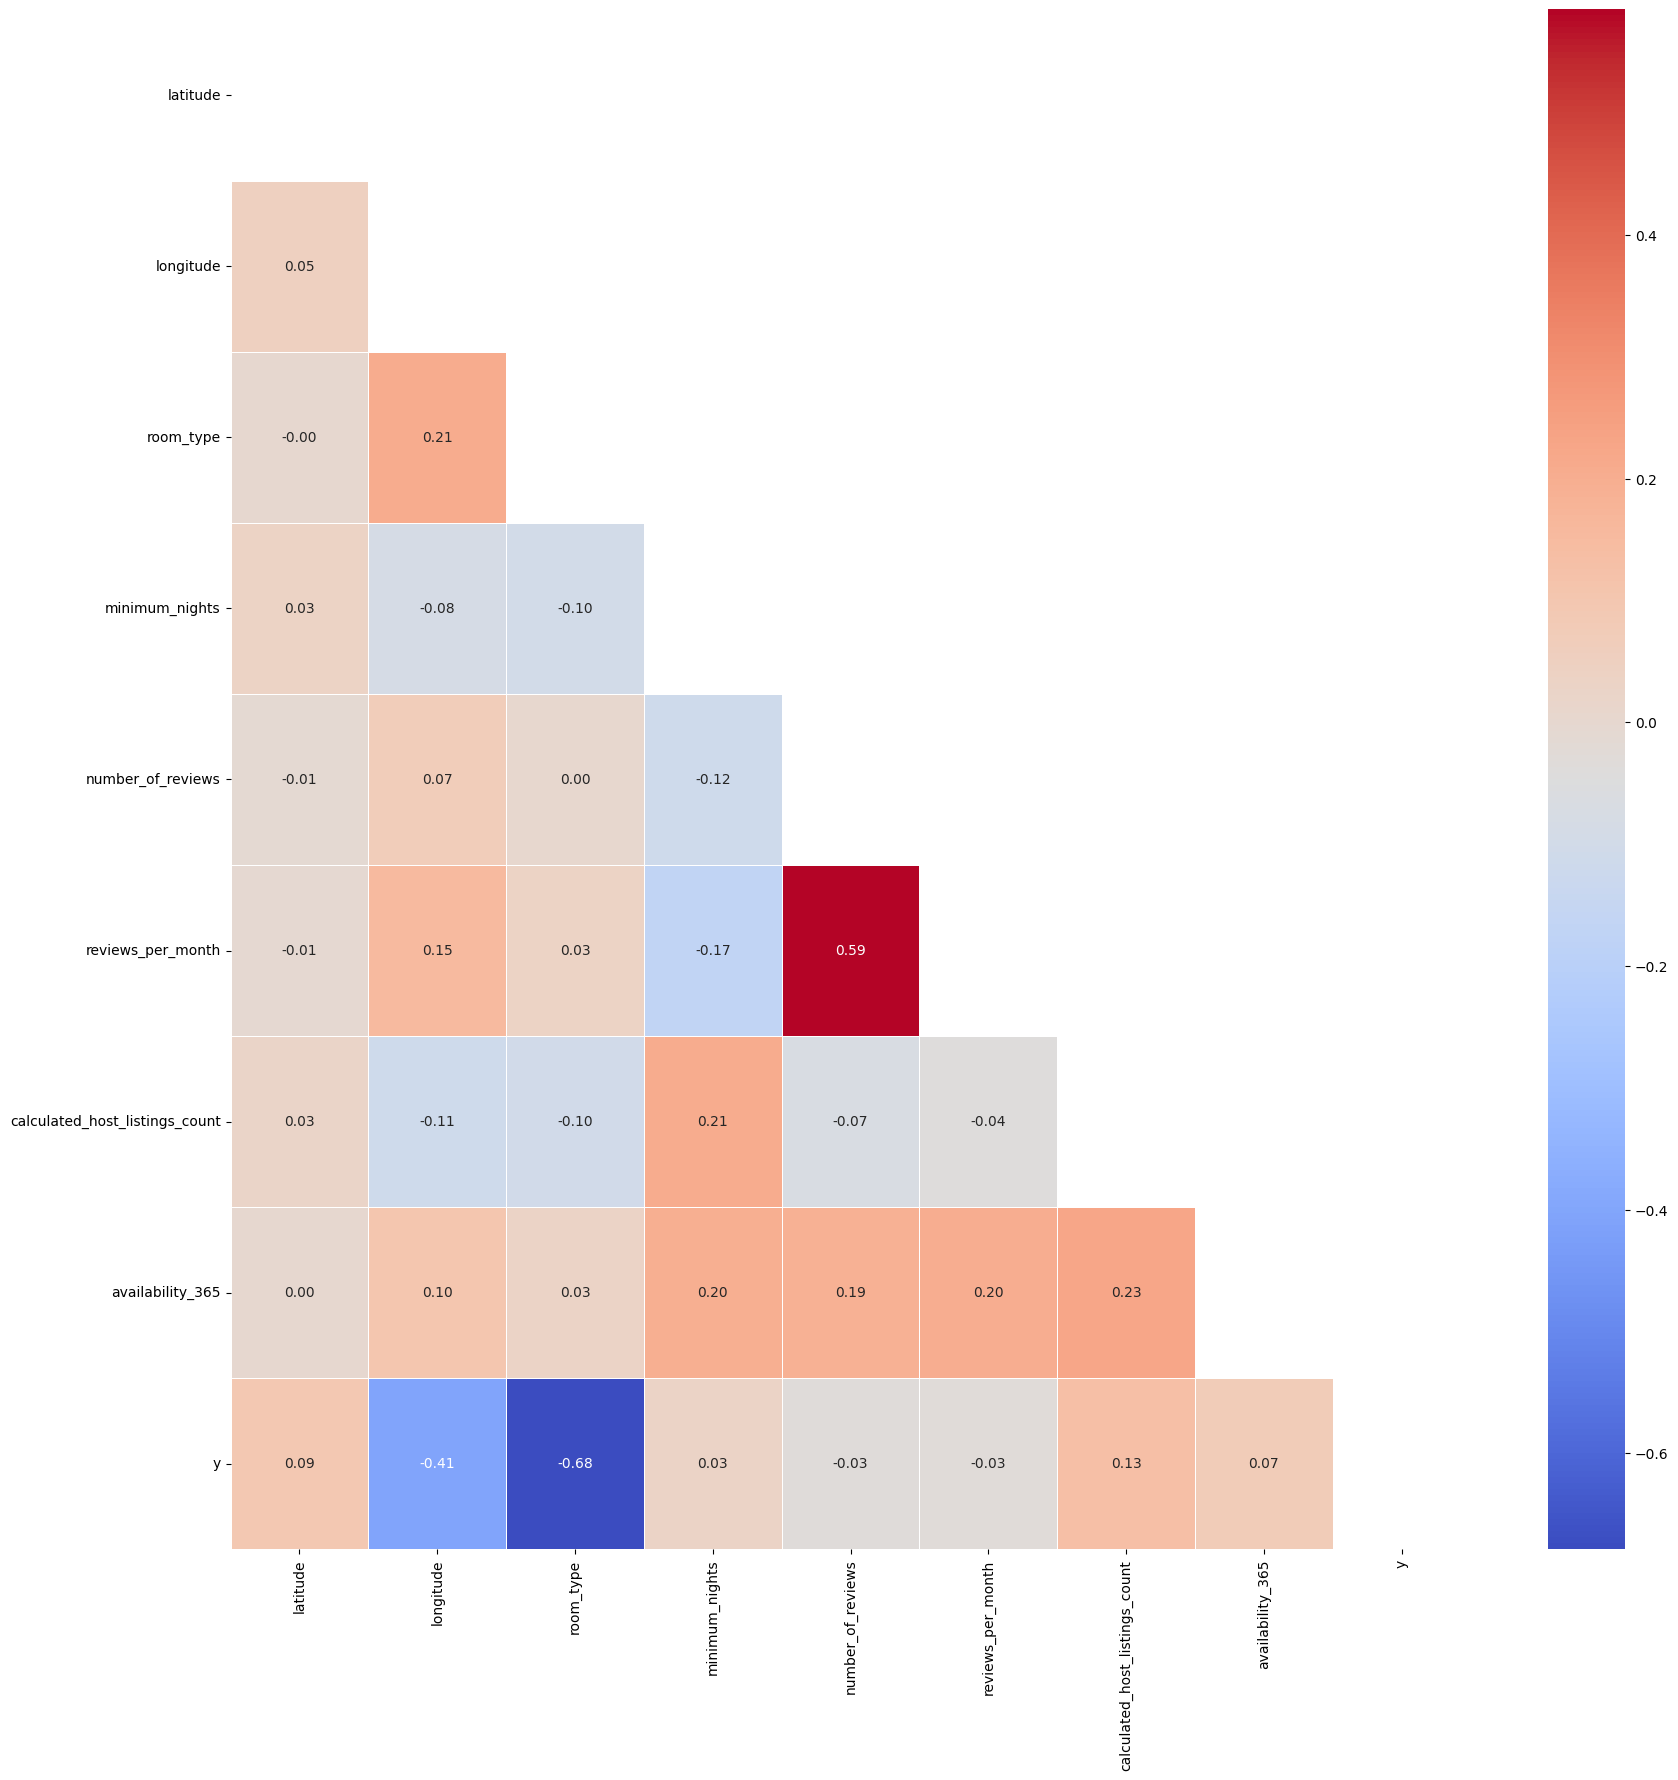

In [39]:
X_corr = X_train1.copy()
X_corr['y'] = y_train1
corr = X_corr.corr()
#corr.style.background_gradient(cmap='coolwarm').format(precision=3)

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [40]:
# Elimino reviews_per_month por alta correlación con number_of_reviews
X_train1.drop('reviews_per_month', axis=1, inplace=True)
X_test.drop('reviews_per_month', axis=1, inplace=True)

/tmp/ipykernel_583/3403648427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1.drop('reviews_per_month', axis=1, inplace=True)


In [41]:
X_train1.shape

(37331, 7)

In [42]:
X_test.shape

(9779, 7)

## Escalar los datos

In [47]:
# Instanciar el escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar esos datos
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train1), columns=X_train1.columns, index=X_train1.index)
X_test_scaler = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [48]:
X_train_scaler

,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0.473758,0.456850,0.0,0.005420,0.018122,0.000000,0.002740
23615,0.832071,0.490070,0.5,0.002710,0.003295,0.000000,0.000000
31183,0.404351,0.447503,0.5,0.002710,0.000000,0.003067,0.000000
29260,0.389149,0.510916,0.0,0.005420,0.143328,0.000000,0.731507
7275,0.557776,0.590581,0.5,0.010840,0.021417,0.000000,0.000000
...,...,...,...,...,...,...,...
11284,0.824899,0.483995,1.0,0.000000,0.000000,0.000000,0.000000
44732,0.537685,0.354815,0.5,0.002710,0.006590,0.000000,0.208219
38158,0.654821,0.415561,0.0,0.078591,0.001647,0.012270,0.715068
860,0.633065,0.401708,0.0,0.002710,0.018122,0.000000,0.005479


## Guardar el conjunto de datos procesado

In [50]:
# Crear carpeta
os.makedirs('data/processed', exist_ok=True)

# Diccionario con los datos a guardar
datos_procesados = {
    'X_train1': X_train1,
    'X_test': X_test,
    'X_train_scaler': X_train_scaler,
    'X_test_scaler': X_test_scaler
}

for nombre, objeto in datos_procesados.items():
    ruta = f'data/processed/{nombre}.pkl'
    with open(ruta, 'wb') as f:
        pickle.dump(objeto, f)